In [167]:
import requests
import qrcode
import matplotlib.pyplot as plt
import time

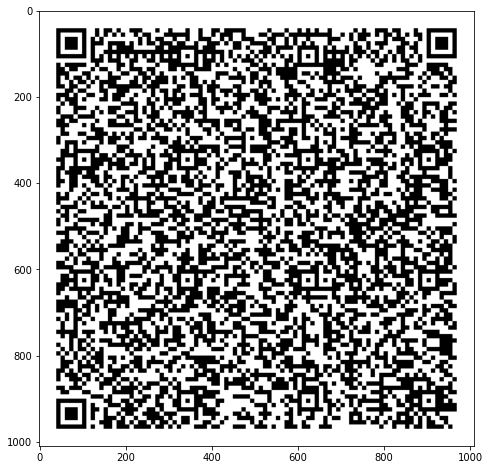

InvitationGenerated
ConnectionResponseSent
Credential Offer Sent


In [168]:
resp = requests.post("http://host.docker.internal:8080/prism-agent/connections", json = {"label": "Connect with Alice"})
connectionId = resp.json()["connectionId"]
invitationUrl = resp.json()["invitation"]["invitationUrl"]
image = qrcode.make(invitationUrl)
image.save("invitationQR")
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image , cmap = 'gray')
plt.show()
conn = requests.get("http://host.docker.internal:8080/prism-agent/connections/"+connectionId).json()
print(conn["state"])
while conn["state"] != "ConnectionResponseSent": # ConnectionResponsePending / ConnectionResponseSent
    conn = requests.get("http://host.docker.internal:8080/prism-agent/connections/"+connectionId).json()
    time.sleep(2)
print(conn["state"])
resp2 = requests.post("http://host.docker.internal:8080/prism-agent/issue-credentials/credential-offers", json = {
    "schemaId": "RootsIDCredential",
    "subjectId": conn["theirDid"],
    "validityPeriod": 3600,
    "claims": {
        "name": "Rodolfo Miranda",
        "company": "RootsID",
        "image": "https://rootsid.com/wp-content/uploads/2022/10/logo-rootsid.png",
        "type": "Atala Prism Credential"
  },
  "automaticIssuance": True,
  "awaitConfirmation": False
}).json()
print("Credential Offer Sent")
